In [2]:
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()
os.chdir(os.getenv("ROOT_DIR"))

In [5]:
# --- Parameters ---
df_train_path = os.getenv("DF_TRAIN_PATH")
df_test_path = os.getenv("DF_NEW_DATA_PATH")

print(df_train_path)

data/raw/train.csv


### General

In [6]:
df_train = pd.read_csv(df_train_path)
df_test = pd.read_csv(df_test_path)

In [8]:
df_train = pd.read_csv(df_train_path)
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [10]:
df_train.info()

# 891 datapoints, 12 cols.
# 10 are features, 1 is the target and 1 the index 
# Age, Cabin and Embarked have missing values (3 features)
# Categorical features: Pclass, Name, Sex, Ticket, Cabin, Embarked (6 features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df_test.info()

# 418 datapoints to predict, 11 cols.
# The same features as the training set, except the target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
# Project
# 1. Analize Sex
## 1.1. Check consistency.
## 1.2. Check distribution.
## 1.3. Check correlation with target.

### Sex variable

In [20]:
## 1.1. Check consistency
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [22]:
df_test.Sex.unique()

array(['male', 'female'], dtype=object)

In [21]:
## 1.2. Check distribution
df_train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
df_test.Sex.value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [ ]:
# More men than women in both datasets.

In [87]:
## 1.3. Check correlation with target

## Methods: statistical:
	# 1. Contingency table
	# 2. Chi-square test if independence
	# 3. Cramers V for correlation
	# 4. Phi coefficient for correlation
	# 5. Logistic regression (coefficients=log-odds)
	# 6. Odds ratio
	# 7. Fisher's exact test
	# 8. Jaccard Similarity score

## Methods: visual:
	# 1. Stacked bar chart
	# 2. Heatmap on contingency table
	# 3. Mosaic plot
	# 4. Venn diagram
	# 5. Decision tree plot.

## Methodology for 2 binary variables:
	# 1. Contingency table
	# 2. Stacked bar chart
	#.3. (optional) in some context one between: chi-square, fisher's exact test, odds ratio, logistic regression.
	# 4. (optional) in some context one between: cramers V, phi coefficient, jaccard similarity score.
	# 5. (optional) to plot: heatmap, mosaic plot, venn diagram, decision tree plot.
	# 6. Show results verbally.
	

In [27]:
### Contingency table
### Contingency table display the frequency of each combination of the levels of two categorical variables.
pd.crosstab(df_train.Sex, df_train.Survived, normalize="index")

# 74% of women survived, while only 18% men do it. 
# INSIGHT 1: Sex is a good predictor of survival.

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [30]:
### Chi-Square Test of independence
### Statistical test to check it two categorical variables are independent or not. The test is based
### on the difference between expected frequencies under independence and the observed frequencies.

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_train.Sex, df_train.Survived)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 statistic: {chi2}, p-value: {p}")

# p-value < 0.05, so we reject the null hypothesis of independence.
# INSIGHT 2: reinforces insight 1. There is a significant association between variables, so Sex is a good predictor of survival.

Chi2 statistic: 260.71702016732104, p-value: 1.1973570627755645e-58


In [33]:
### Cramer's V Test
### Cramer's V is a measure if association between two categorical variables.
### it ranges from 0 to 1, where 0 means no association and 1 a strong association.
import numpy as np 

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"Cramer's V: {cramers_v}")

# Cramer's V is 0.54, so there is a relatively strong association between varibles.
# At least, it discards the indepence hypothesis.

Cramer's V: 0.5409359434469282


In [46]:
### D. Phi coefficient
### Equivalent to Pearson correlation coefficient, for binary categorical varibles.
### It ranges from -1 to 1, where -1 means a perfect negative association, 0 no association 
### and 1 a perfect positive association.

import math

contingency_table = pd.crosstab(df_train.Sex, df_train.Survived)
a = contingency_table.iloc[0, 0]
b = contingency_table.iloc[0, 1]
c = contingency_table.iloc[1, 0]
d = contingency_table.iloc[1, 1]

phi = (a * d - b * c) / math.sqrt((a + b) * (c + d) * (a + c) * (b + d))
print(f"Phi Coefficient: {phi}")

# Phi coefficient reinforces insight 1. There is association between variables.

Phi Coefficient: -0.5433513806577551


In [67]:
### Logistic Regression coeficients
import statsmodels.api as sm

x = df_train.Sex.astype('category').cat.codes # independent variable
y = df_train.Survived.astype('category') # dependent variable

x = sm.add_constant(x)

model = sm.Logit(y, x).fit()
print(model.summary())

# --- Logistic Regression ---

# obs: 1=male, 1=survived

# Dep. Variable: dependent variable
# Model: model used. Logit is a logistic regression model.
# Method: optimization algorithm used to fit the model. MLE is the maximum likelihood estimation.
# Df residuals: degree of fredom of residuals. (No obs - No parameters)
# Df model: degree of freedom of the model. (No parameters - 1)

# Pseudo R-squared: measure of how well the model fits the data.
# It ranges from 0 to 1, where 0 means the model does not fit the data and 1 the model fits perfectly.
# Unlike R-squared, it does not have a unique definition or clear interpretation. Use it carefully.T

# Log-Likelihood: measure of goodness of fit. Larger values are better.

# LL-Null: log-likelihood of a model that does not include any predictors, only the intercept. It
# is used to get the goodness of fit of the model. It should be compared with the log-likelihood of the model,
# to check if the model is better than a model that does not include any predictors.

# LLR p-value: p-value from the likelihood ratio test.
# p-value small (less than 0.05) means that the model is better than a 
# model that does not include any predictors.

# Coef: coefficients of the model. They represent the log-odds of the dependent variable:
# In this case coef=-2.5 means that as the independent variable increases by 1 unit (pass from women to men)
# the log-odds of the dependent variable decrease by 2.5 units.

# Z: z-score of the coefficients. It is used to test the null hypothesis that the coefficient is equal to zero.

# P>|z|: p-value of the z-score. It is used to test the null hypothesis that the coefficient is equal to zero.
# A small p-value (less than 0.05) means that the coefficient is significantly different from zero.

# [0.025 0.975]: 95% confidence interval of the coefficients.

# ------------------# 

# The relevant info here is:
# 1. Coef: -2.5, small p-value. Men (= 1) implies a decrease in the log-odds of survival.
# 2. LLR p-value: small. The model is better than a model that does not include any predictors. So, 
# the variable Sex do something.

# It reinforces insight 1.

Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.2266
Time:                        09:44:31   Log-Likelihood:                -458.90
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.020e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0566      0.129      8.191      0.000       0.804       1.309
0             -2.5137      0.

In [69]:
### Odds Ratio

contingency_table = pd.crosstab(df_train.Sex, df_train.Survived)
a = contingency_table.iloc[0, 0]
b = contingency_table.iloc[0, 1]
c = contingency_table.iloc[1, 0]
d = contingency_table.iloc[1, 1]

odds_ratio = (a / b) / (c / d)
print(f"Odds Ratio: {odds_ratio}")

# Measure of association between two binary variables. 
# It tells us how much more (or less) likely one event is to occur 
# in presence of the other event.

# Odds ratio greater than 1 means positive association.

Odds Ratio: 0.08096731594585671


In [70]:
contingency_table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [71]:
### Fisher's Exact Test

from scipy.stats import fisher_exact

# Perform Fisher's Exact Test
contingency_table = pd.crosstab(df_train.Sex, df_train.Survived)
odds_ratio, p_value = fisher_exact(contingency_table)
print(f"Odds Ratio: {odds_ratio}, p-value: {p_value}")

# Fisher's Exact test is a statistical test used to determine if there are nonrandom associations 
# between two categorical variables. It is used when the sample size is small.

# It is based in odd's ratios. It is a measure of association between two binary variables.

# The p-value is less than 0.05, so we reject the null hypothesis of independence.

# It reinforces insight 1. p-value < 0.05, so we reject the null hypothesis of independence. There is 
# a significant association between variables.

Odds Ratio: 0.08096731594585672, p-value: 6.463921564583144e-60


In [78]:
### Jaccard Similarity score

from sklearn.metrics import jaccard_score

sex = df_train.Sex.apply(lambda x: 0 if x == "male" else 1) # male=1. 
# obs. in jaccard the coding must be consistent with hypothesis.
# here, male = died = 0, women=survived=1, so a positive jaccard validates this hypothesis.

survived = df_train.Survived

jaccard = jaccard_score(sex, survived)

print(f"Jaccard Score: {jaccard}")

# Pairwise Jaccard Similarity measures the similarity between two sets of data.
# For binary data, it compares the similarity between two binary variables as the 
# ratio of the intersection to the union. aka: (A and B) / (A or B)
# It ranges from 0 to 1, where 0 means no similarity and 1 perfect similarity.

# It reinforces insight 1. Jaccard score is 0.54, so there is a relatively strong association between variables.

Jaccard Score: 0.5508274231678487


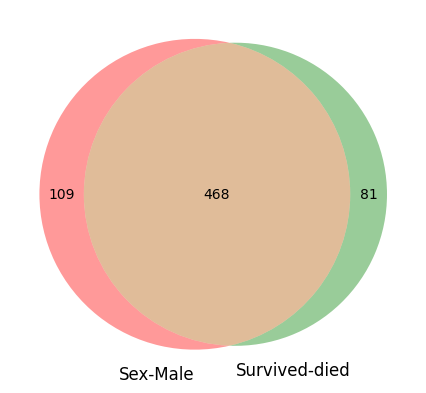

In [85]:
### Venn Diagram

from matplotlib_venn import venn2

set_sex_male = set(df_train[df_train.Sex == 'male'].index)
set_survived_died = set(df_train[df_train.Survived == 0].index)

venn2([set_sex_male, set_survived_died], set_labels=('Sex-Male', 'Survived-died'))
plt.show()

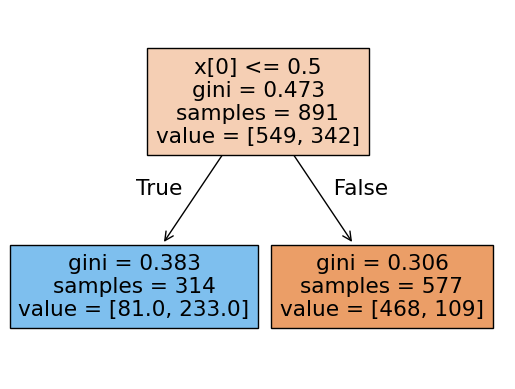

In [86]:
### Decision Tree Plot

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X = df_train['Sex'].astype('category').cat.codes.values.reshape(-1, 1) # men=1
y = df_train['Survived'].astype('category').cat.codes

clf = DecisionTreeClassifier().fit(X, y)
tree.plot_tree(clf, filled=True)
plt.show()


<Axes: xlabel='Survived', ylabel='Sex'>

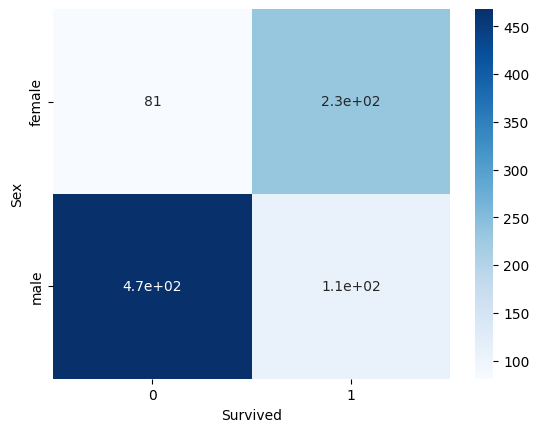

In [37]:
### Heatmap of the contingency table

import seaborn as sns
import matplotlib.pyplot as plt

contingeny_table = pd.crosstab(df_train.Sex, df_train.Survived)
sns.heatmap(contingency_table, annot=True, cmap='Blues')

### Reinforcement of insight 1. The majority of data is concentrated in female-survived 
### and male-died categories.

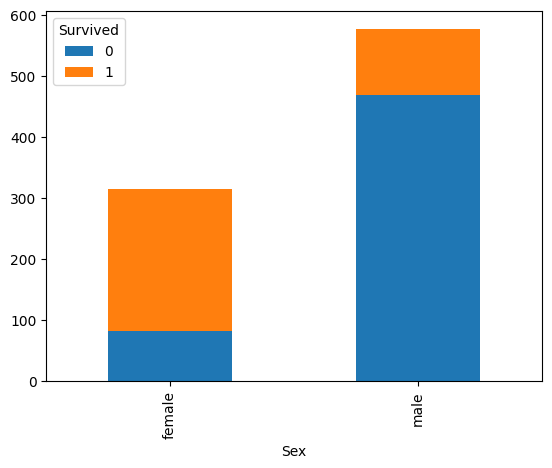

In [39]:
### Stacked bar plot

contingency_table = pd.crosstab(df_train.Sex, df_train.Survived)
contingency_table.plot(kind='bar', stacked=True)
plt.show()

### Reinforcement of insight 1.

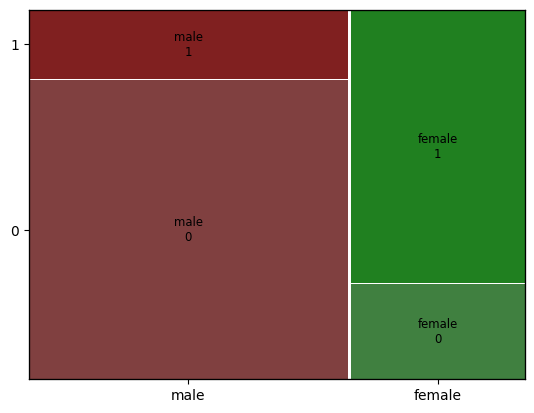

In [44]:
### Mosaic plot
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df_train, ['Sex', 'Survived'])
plt.show()

### Reinforcement of insight 1.
### Vast majority of data is concentrated in male-died and female-survived categories.

In [ ]:
# Main insights:

# 1. There is a significant association between Sex and survived. Men are less likely to survived than women.
# Sex is a good predictor of for the target variable.